# Исследование продаж видео игр

В нашем распоряжении данные о продажах игр, оценках пользователей и экспертов, жанры и платформы.

Наша задача выявить закономерности определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ознакомление с данными

In [2]:
data = pd.read_csv('/games.csv')

Вывод первых 10 строк

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывод информации о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Подсчет пропусков


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Подсчёт процента пропусков


In [6]:
(data.isna().mean()*100).round(2)

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

Проверка наличия дубликатов


In [7]:
data.duplicated().sum()

0

Вывод: В ходе знакомства с данными обнаружено большое количества пропусков в колонках critic_score, user_score и rating. В дальнейшем, из-за малого количества пропусков, возможно избавиться от строк в колонках name и year_of_release.

## Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [8]:
data = data.rename(columns=str.lower)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Удаление строк из датафрейма с пропущенными значениями в колонке name

In [9]:
data = data.dropna(subset=['name'])

Малое количество пропусков в колонке name позволяет от них избавиться.

### Преобразование данных в нужные типы и заполнение пропусков

Удаление пропущенных значений в колонке year_of_release преобразование в тип int

In [10]:
data = data.dropna(subset=['year_of_release'])

In [11]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В колонке user_score присутствует аббревиатура TBD, которая означает To Be Discussed (подлежит обсуждению). В игровом комьюнити это сокращение применятеся в случае когда разработчик анонсировал новую игру,а объективную оценку игроки поставить не могут до тех пор пока сами её "не пощупают".


С целью проведения дальнейших математических операций с колонкой user_score заменим значение 'tbd' на NaN и приведём её к типу данных float

In [13]:
data.loc[data["user_score"] == "tbd", "user_score"] = np.NaN

In [14]:
data['user_score'] = data['user_score'].astype('float')

Согласно классификатору ESRB рейтинг Е(everyone) соответствует рейтингу К-А(kids to adult). Заменим рейтинг К-А на Е

In [15]:
data['rating'] = data['rating'].str.replace('K-A', 'E')

Заполнение пропусков в колонках critic_score, user_score и rating

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Строки датасета с пропущенными значениями в колонках critic_score и user_score не стоит заполнять средними или медианными значениями, т.к. игру могли не оценивать как критики, так и игроки.

In [17]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Строки датасета с пропущенными значениями в колоке rating не стоит заполнять по причине того, что некоторые игры могли не попасть на американский, европейский или японкий рынки. К тому же, помимо ESRB, которая действует на территории Северной Америки и Канады, существуют европейская (PEGI) и японская (CERO) рейтинговые системы. Все эти системы отличаются друг от друга критериями допуска к контенту определённого характера, присвоением цифрового или буквенного обозначения, а также началом своего действия. В свою очередь, каждый из пердставленных жанров может иметь разную возрастную категорию.

### Подсчёт продаж во всех регионах

In [18]:
data['total_sale'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

In [19]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


## Проведение исследовательсвого анализа 

### Сколько игр выпускалось в разные годы.

In [20]:
year_of_release = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


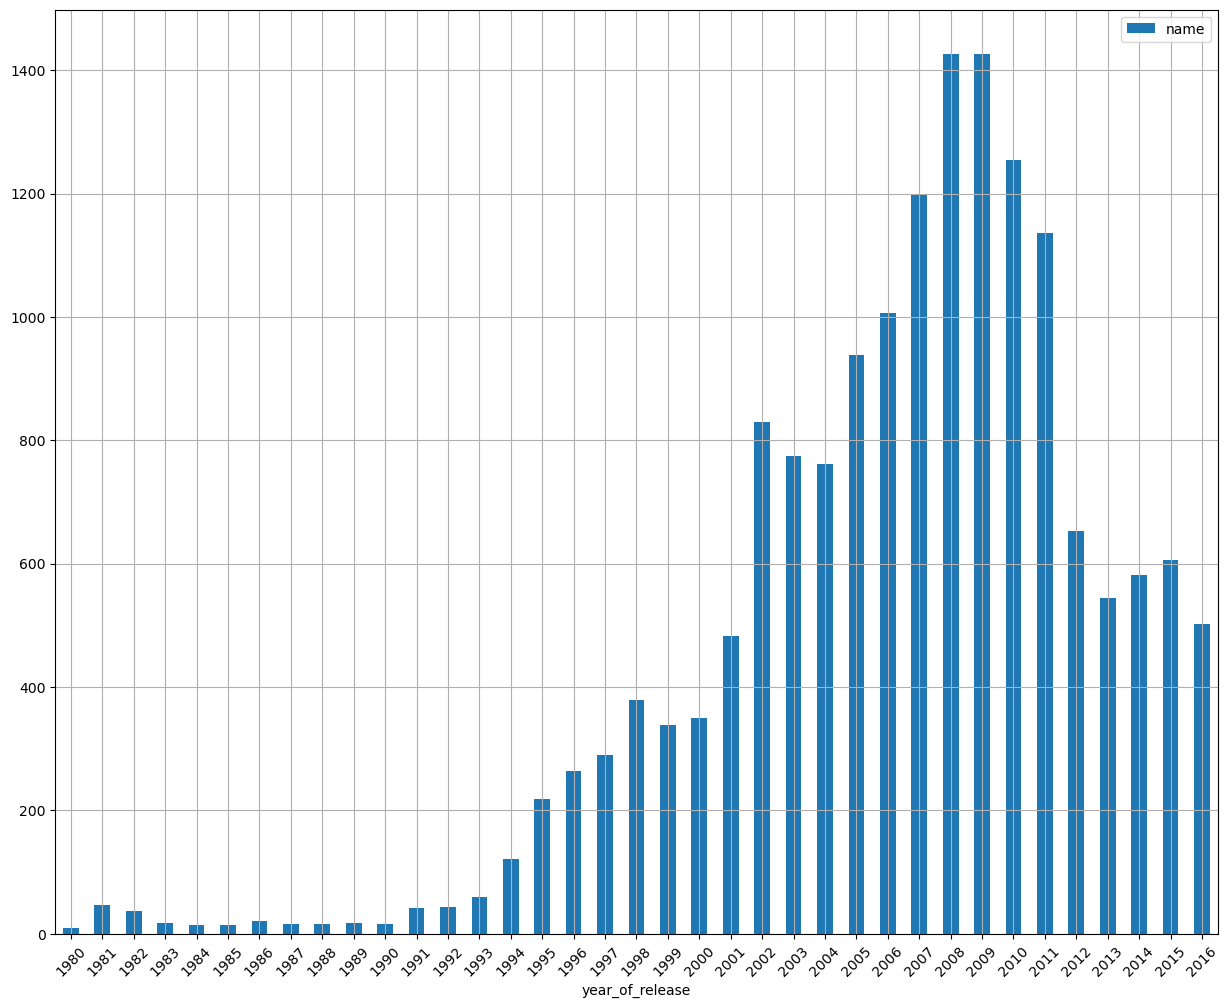

In [21]:
year_of_release.plot(kind='bar', grid = True, figsize = (15, 12), rot=45)
plt.show();

Вывод: с 1992 г. по 2009 г. наблюдается рост количества выпускаемых игр. Начиная с 2011 года количество релизов резко сократилось. Возмжоно это связано со сложностью производства игр нового поколения.

Для проведения дальнейшего анализа нас интересуют последние 5 лет гейм индустрии. 

### Как менялись продажи по платформам

Выбираем 5 платформ с наибольшими суммарными продажами

In [22]:
data.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False).head()

,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Создадим таблицу хранящую информацию о 5 платформах с наибольшими суммарными продажами

In [23]:
platform_sales = data.loc[data['platform'].isin(['PS2','X360','Wii','PS3','DS'])]
platform_sales = platform_sales.query('year_of_release >= 2000')

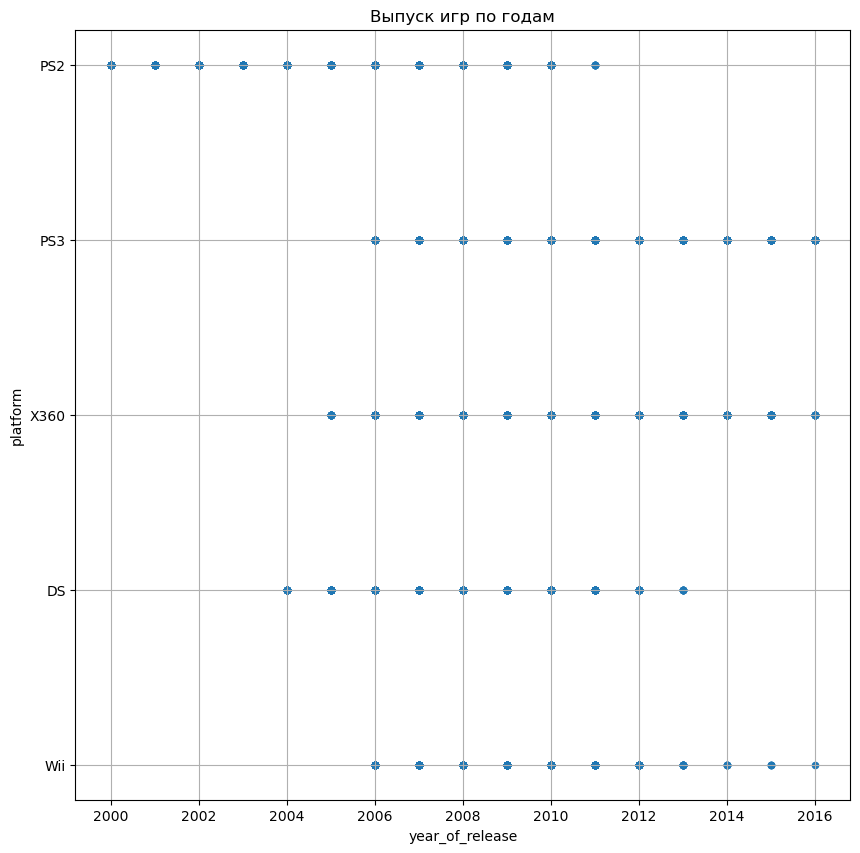

In [24]:
platform_sales.plot(x='year_of_release', y='platform', kind='scatter', grid=True, figsize=(10,10), title ='Выпуск игр по годам')
plt.show()

Вывод: исходя из графика характерный срок существования платформы от 10 до 12 лет, а появление новой от 1 года до 3 лет. 

### Выбор данных для построения прогноза на 2017 г.

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Для построения прогноза составим датасет с  информацией последних 8 лет гейм индустрии и исключим платформы которые в ближайшие 2 года перестанут обслуживаться производителем или уже не актуальны.

In [26]:
prediction = data.query('year_of_release >= 2012')
prediction

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


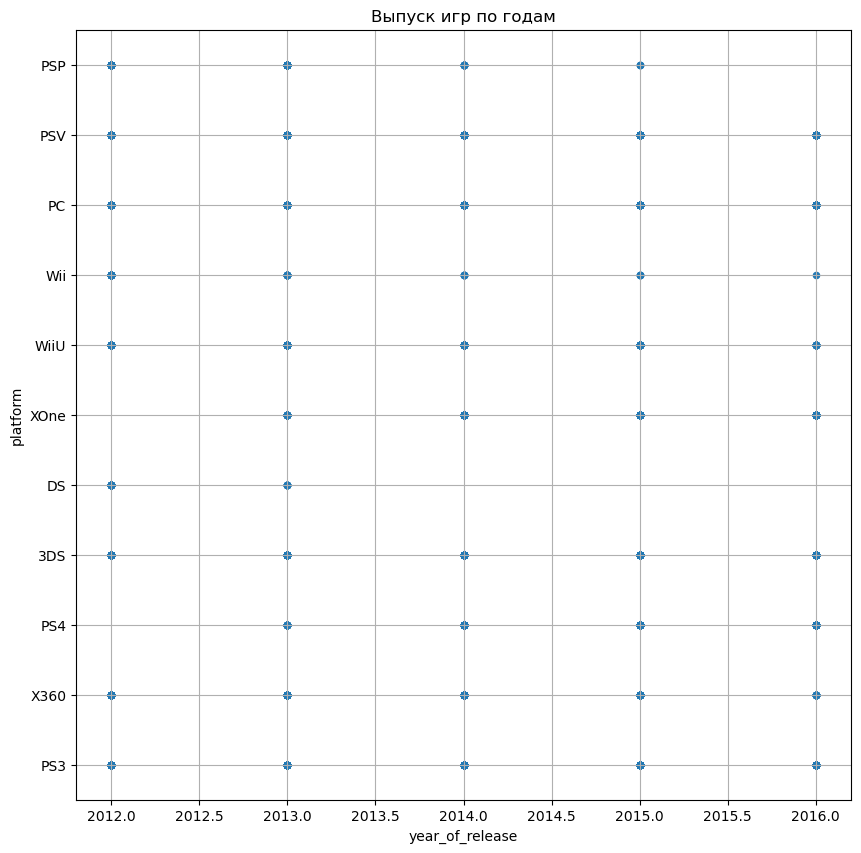

In [27]:
prediction.plot(x='year_of_release', y='platform', kind='scatter', grid=True, figsize=(10,10), title ='Выпуск игр по годам')
plt.show();

Пользуясь информацией из полученного графика составим датасет в котором сохраним информация о релизе игр с 2012 года на следующих платформах:
1. PSV
2. WiiU
3. XOne
4. PC 
5. 3DS
6. PS4

In [28]:
prediction = prediction.loc[prediction['platform'].isin(['PSV','WiiU','XOne','PC','3DS','PS4'])]
prediction

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Платформы лидирующие по продажам

Рассмотрим лидеров продаж

In [29]:
prediction.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False)

,total_sale
platform,
PS4,314.14
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18


### "Ящик с усами" по глобальным продажам игр в разбивке по платформам


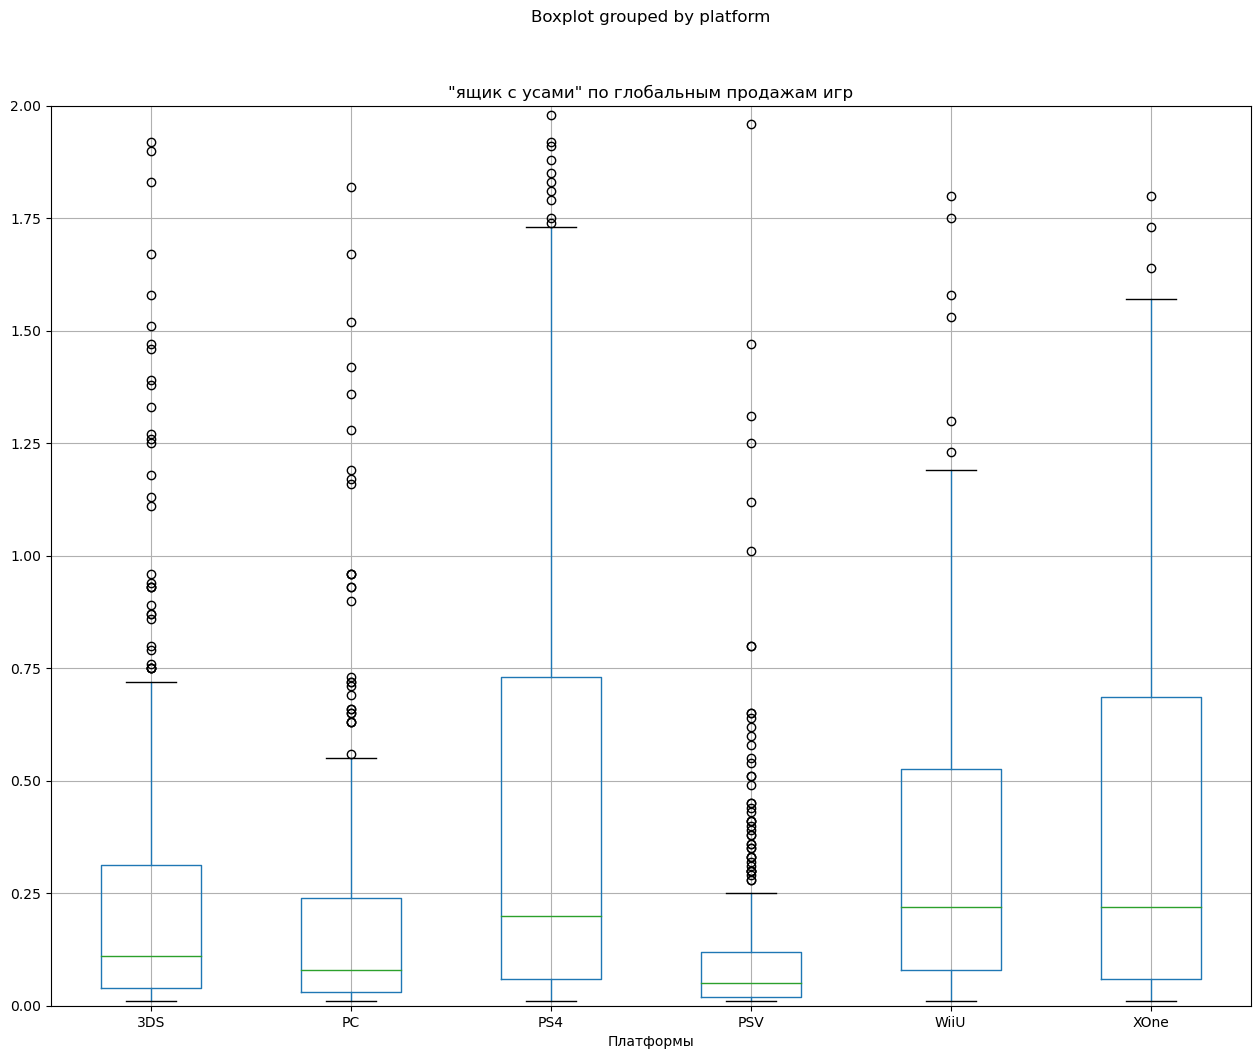

In [30]:
prediction.boxplot(column=['total_sale'], by=['platform'], figsize=(15,12))
plt.xlabel('Платформы');
plt.title('"ящик с усами" по глобальным продажам игр');
plt.ylim(0,2);
plt.show();

Вывод: из полученного результата видно, что игроки готовы платить больше за игры на PS4, XOne и WiiU.

### Корреляция между отзывами и продажами внутри одной популярной платформы


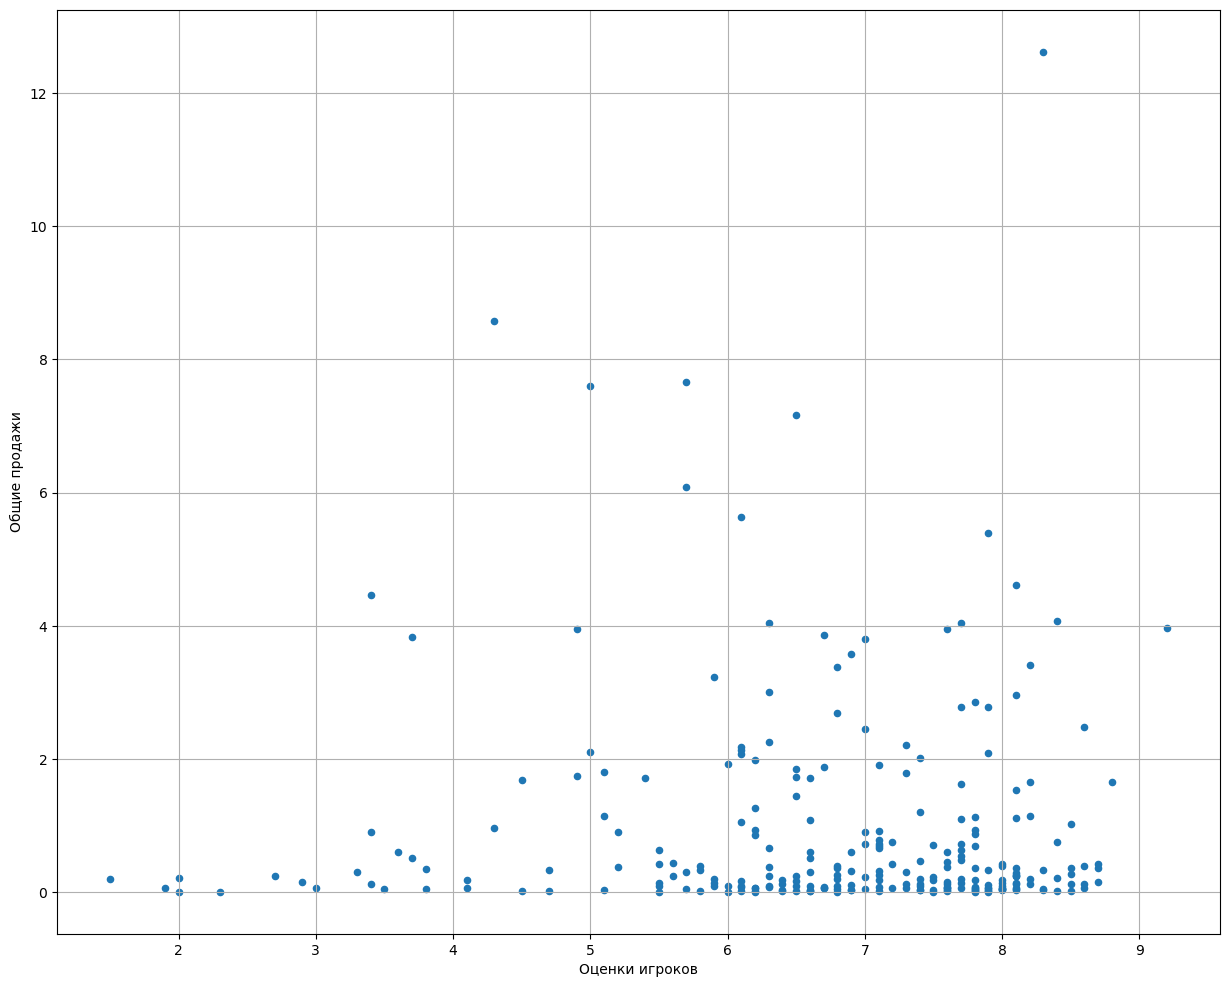

In [31]:
PSF = prediction.query('platform == "PS4"')
PSF.plot(x='user_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки игроков');
plt.ylabel('Общие продажи');
plt.show()

In [32]:
PSF['total_sale'].corr(PSF['user_score'])

-0.031957110204556424

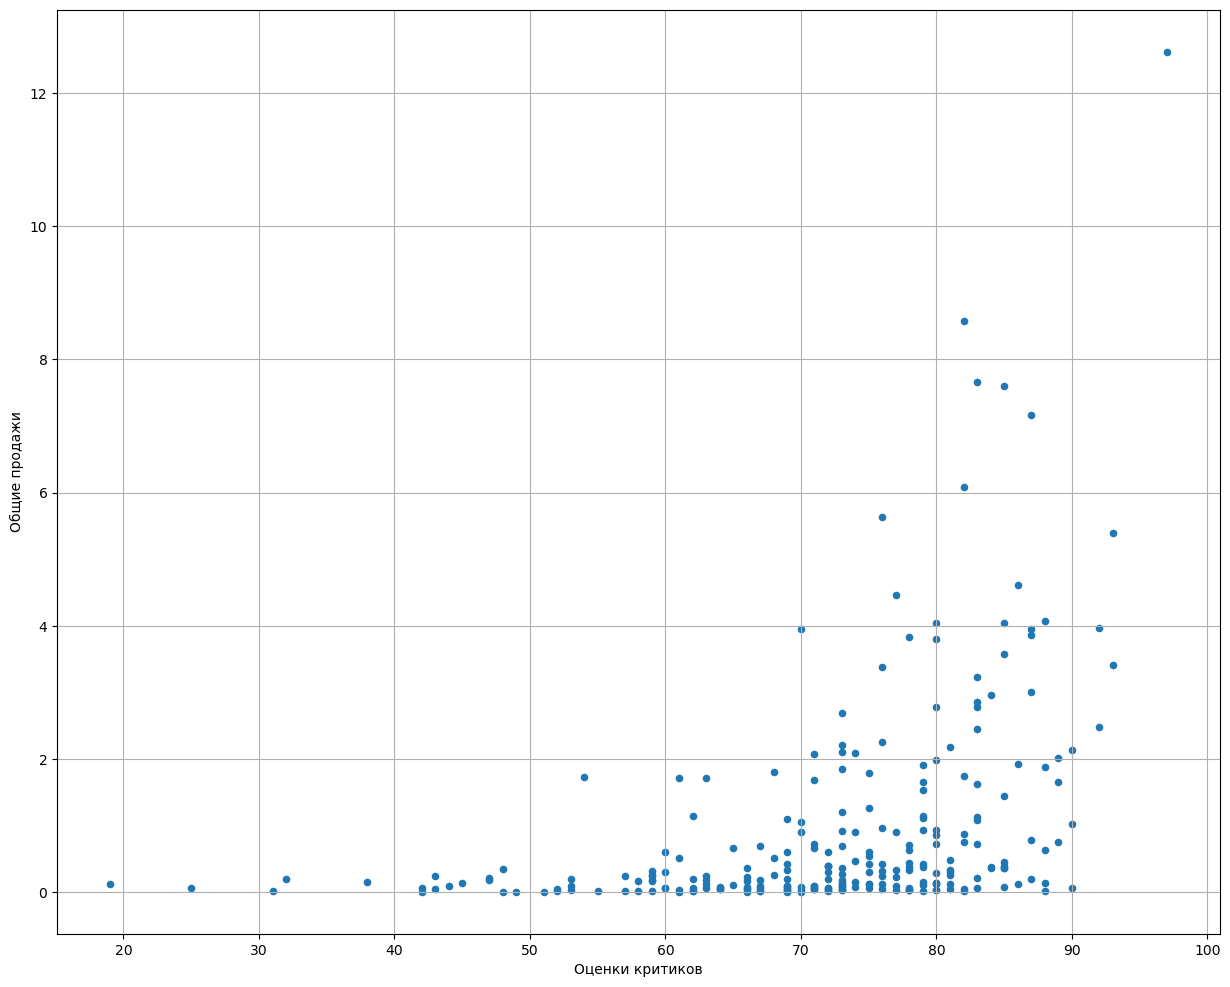

In [33]:
PSF = prediction.query('platform == "PS4"')
PSF.plot(x='critic_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки критиков');
plt.ylabel('Общие продажи');
plt.show()

In [34]:
PSF['total_sale'].corr(PSF['critic_score'])

0.406567902061781

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод, что наблюдается средняя зависимость между оценками критиков и общими продажами. В то время как взаимосвязь с оценками игроков очень слабая.

### Соотношение выводов с продажами на других платформах


Посчитаем корреляцию Пирсона для 3DS

In [35]:
TDS = prediction.query('platform == "3DS"')
TDS['total_sale'].corr(TDS['user_score'])

0.19758263411038596

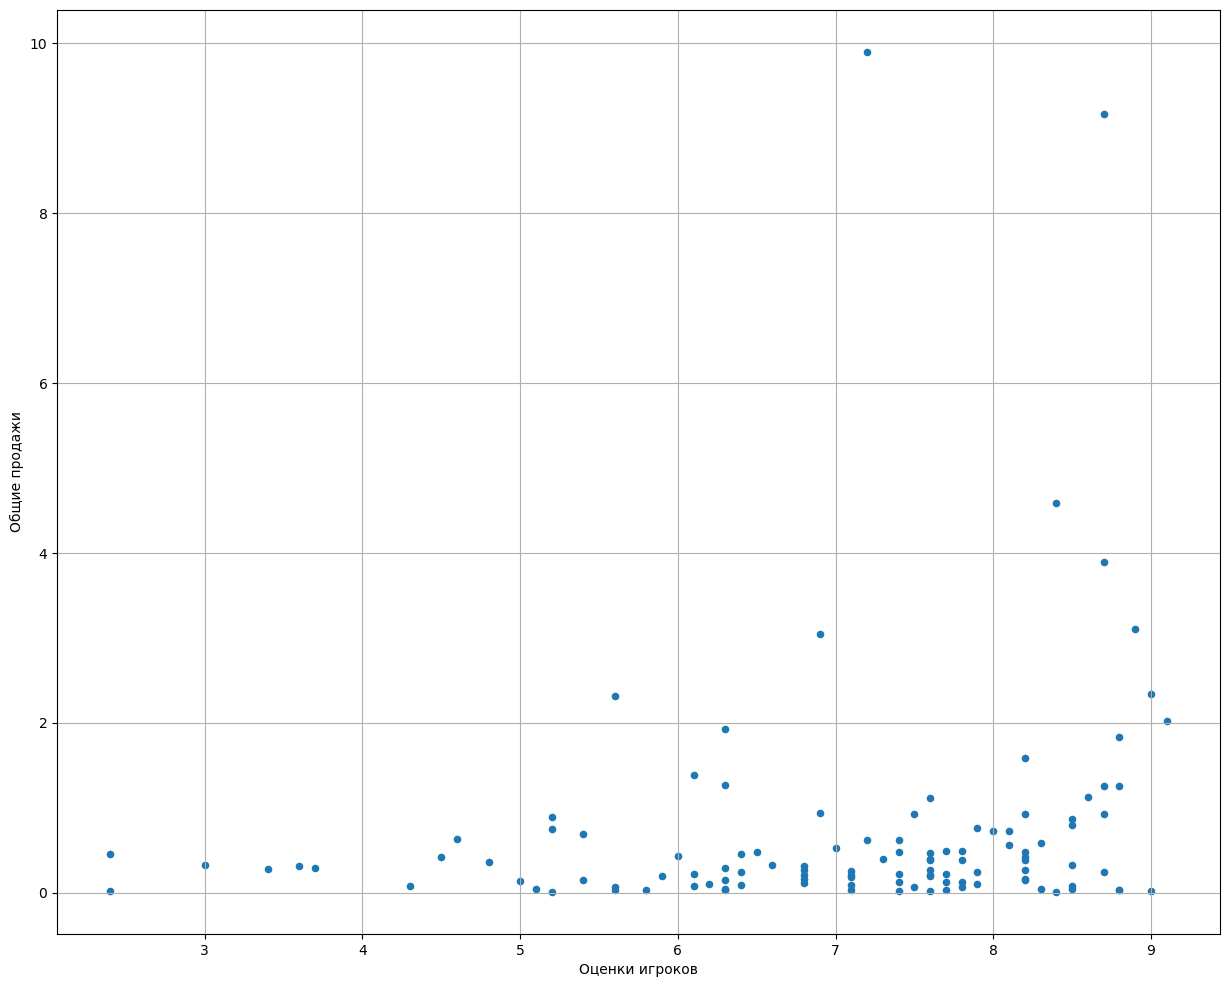

In [36]:
TDS.plot(x='user_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки игроков');
plt.ylabel('Общие продажи');
plt.show()

In [37]:
TDS['total_sale'].corr(TDS['critic_score'])

0.32080286953607845

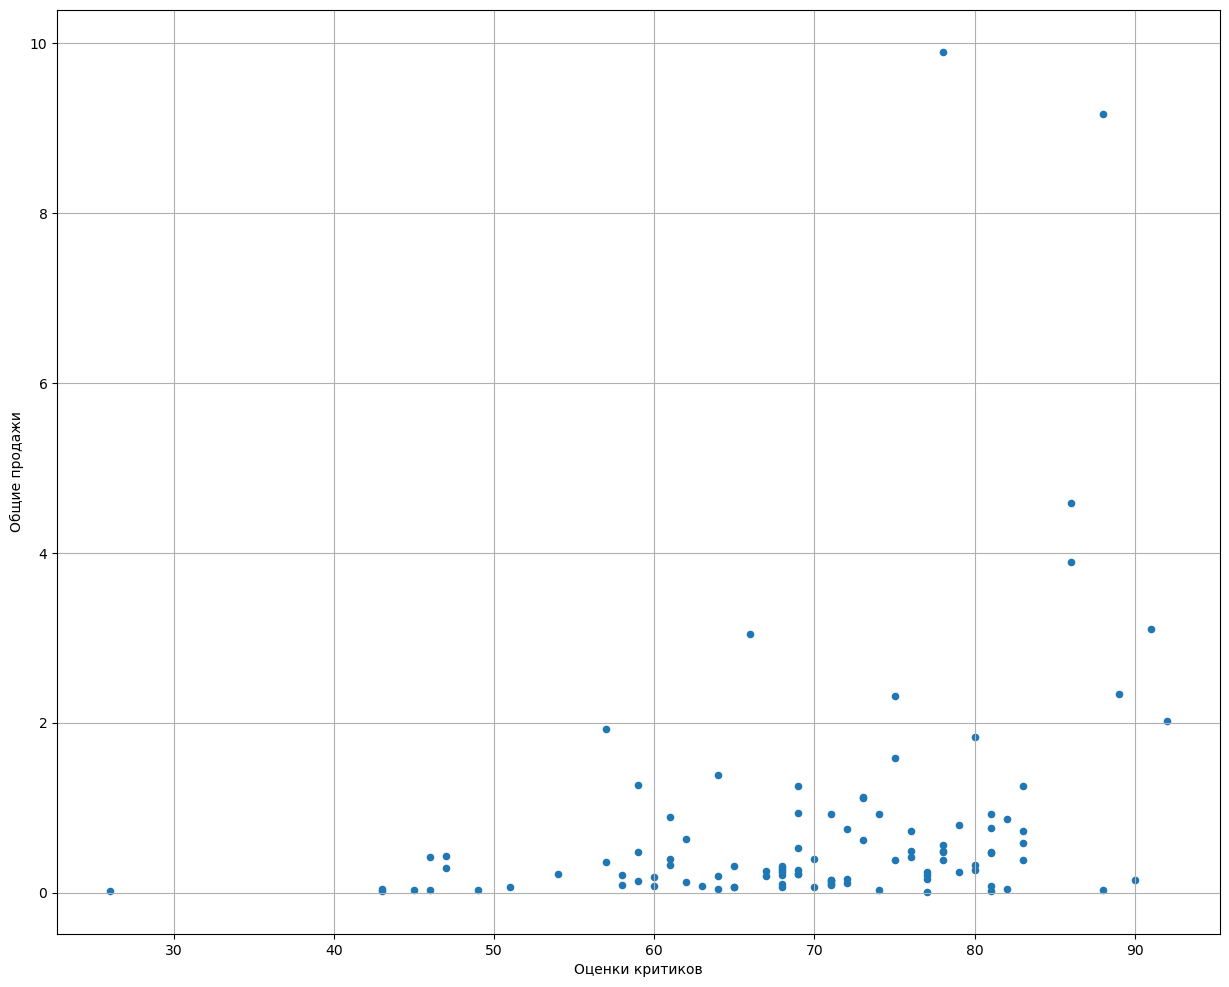

In [38]:
TDS.plot(x='critic_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки критиков');
plt.ylabel('Общие продажи');
plt.show()

Посчитаем корреляцию Пирсона для XOne

In [39]:
XOne = prediction.query('platform == "XOne"')
XOne['total_sale'].corr(XOne['user_score'])

-0.06892505328279412

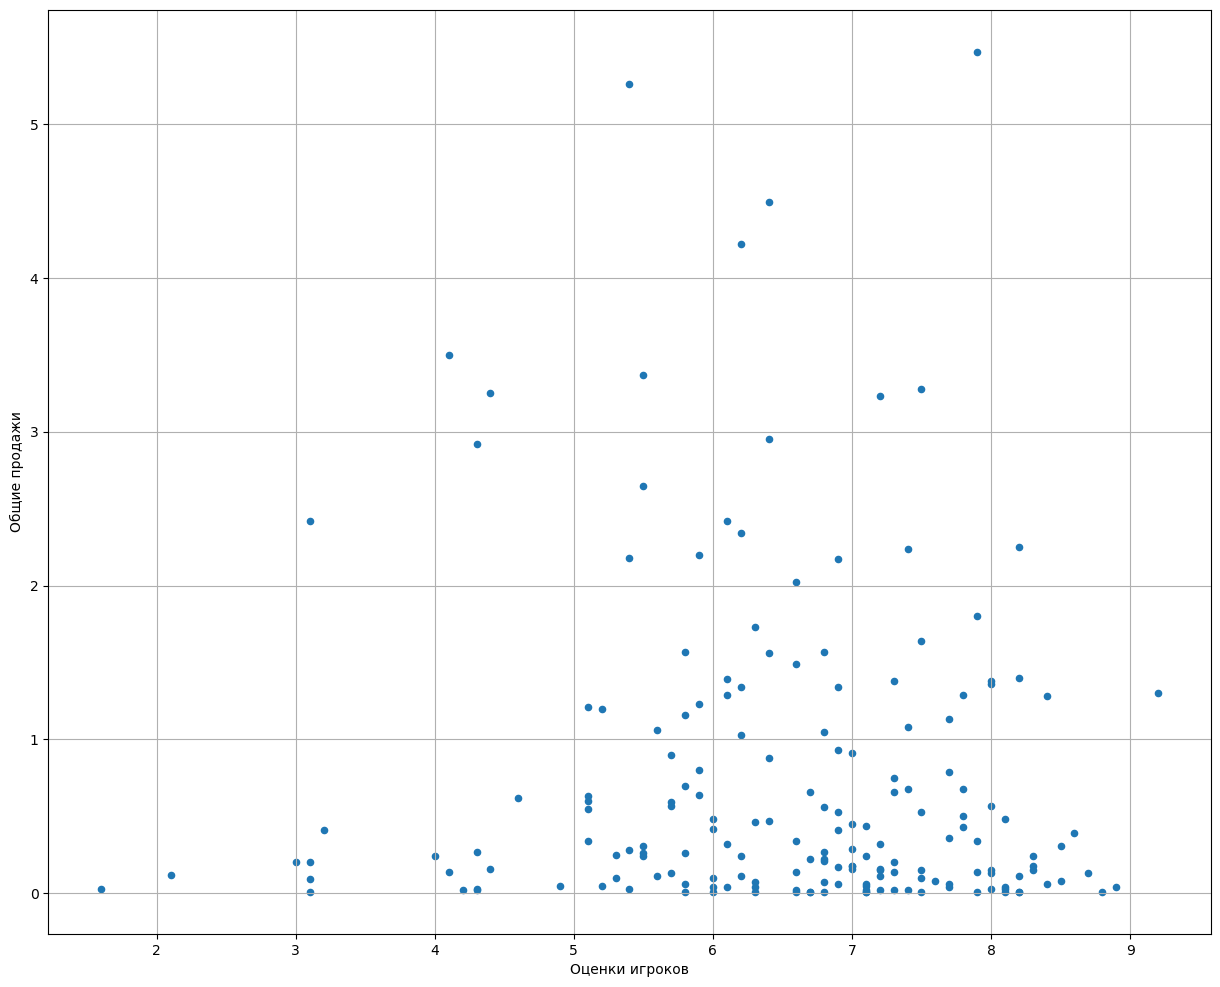

In [40]:
XOne.plot(x='user_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки игроков');
plt.ylabel('Общие продажи');
plt.show()

In [41]:
XOne['total_sale'].corr(XOne['critic_score'])

0.41699832800840175

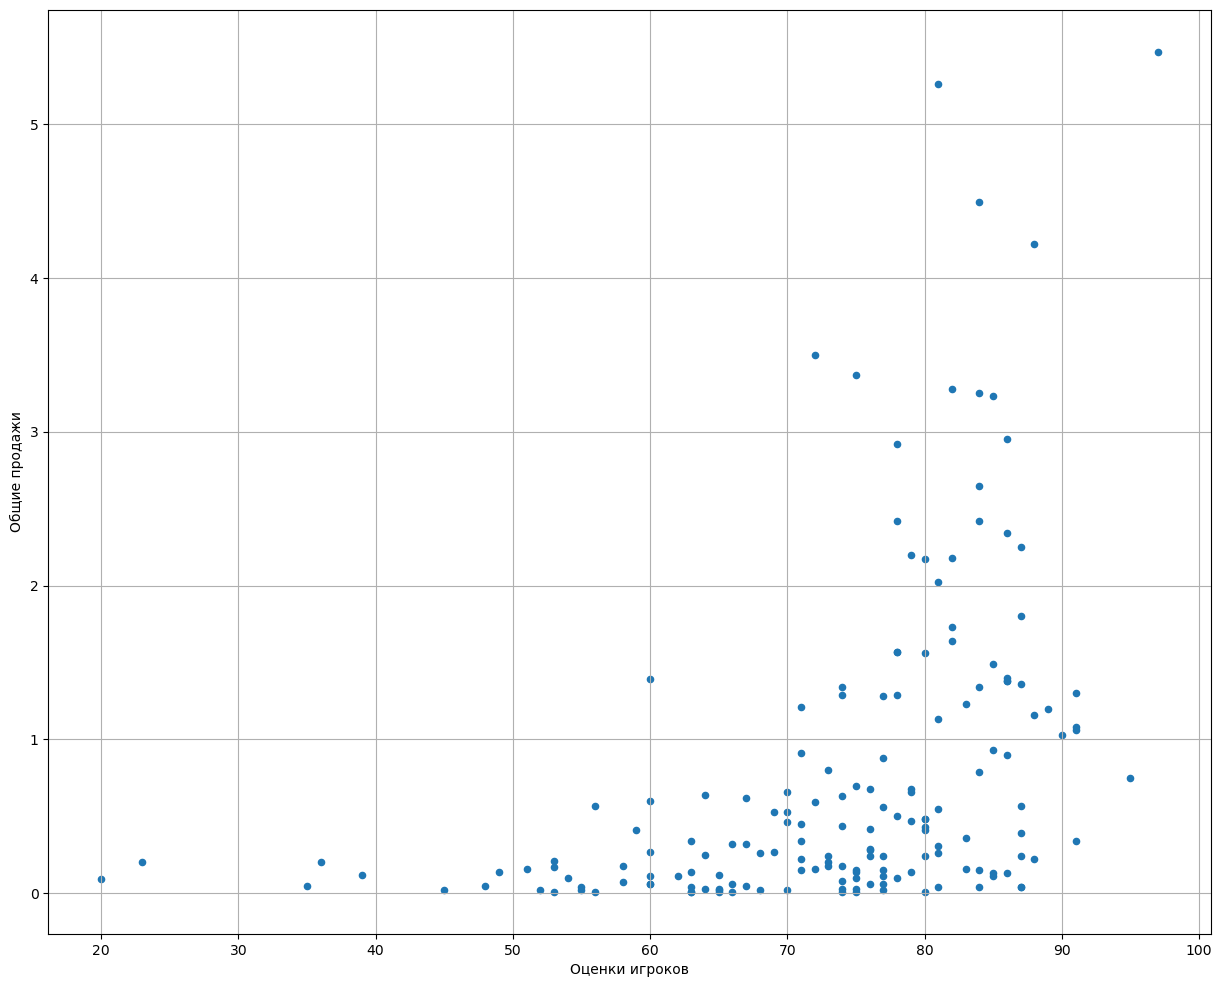

In [42]:
XOne.plot(x='critic_score', y='total_sale', kind='scatter', grid = True, figsize=(15,12))
plt.xlabel('Оценки игроков');
plt.ylabel('Общие продажи');
plt.show()

Вывод: похожая ситуация между оценками и общими продажами наблюдается с 3DS и XOne. Крайне слабая связь между оценками игроков но средняя с оценкаим критиков.

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод, что наблюдается средняя зависимость между оценками критиков и общими продажами. В то время как взаимосвязь с оценками игроков очень слабая.

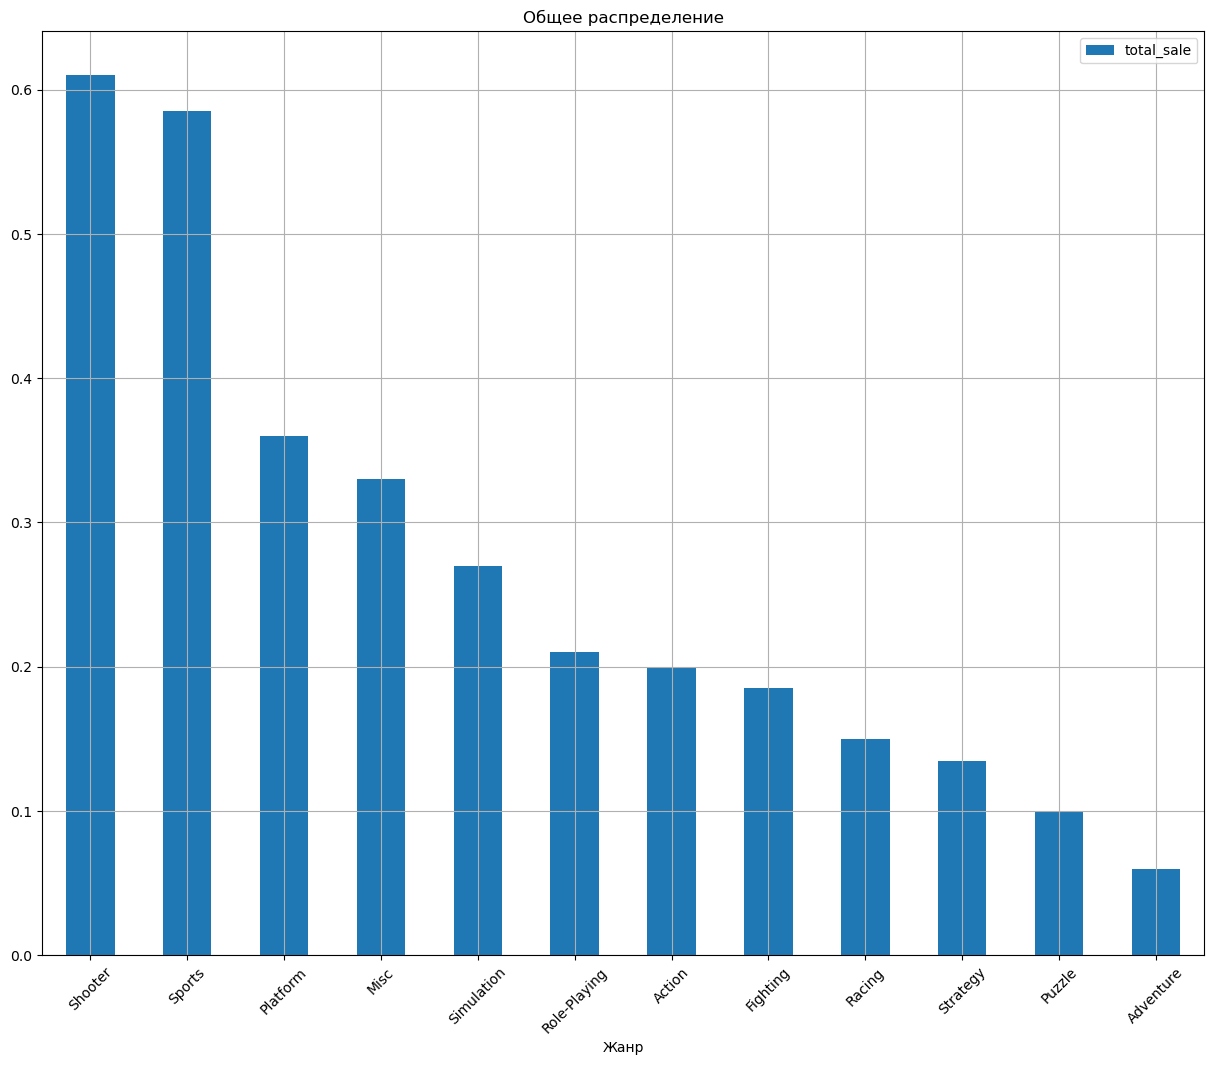

In [43]:
(
    prediction
    .query('user_score >= 5 and critic_score >= 50')
    .groupby('genre')
    .agg({'total_sale':'median'})
    .sort_values(by='total_sale', ascending = False)
    .plot(kind='bar', grid = True, figsize = (15, 12), rot=45)
)
plt.xlabel('Жанр');
plt.title('Общее распределение');
plt.show();

Вывод: Исходя из графика самые прибыльные жанры: Shooter и Sports. Замыкает рейтинг Adventure.

## Составление портрета пользователей

### Самые популярные платформы (определить топ-5)

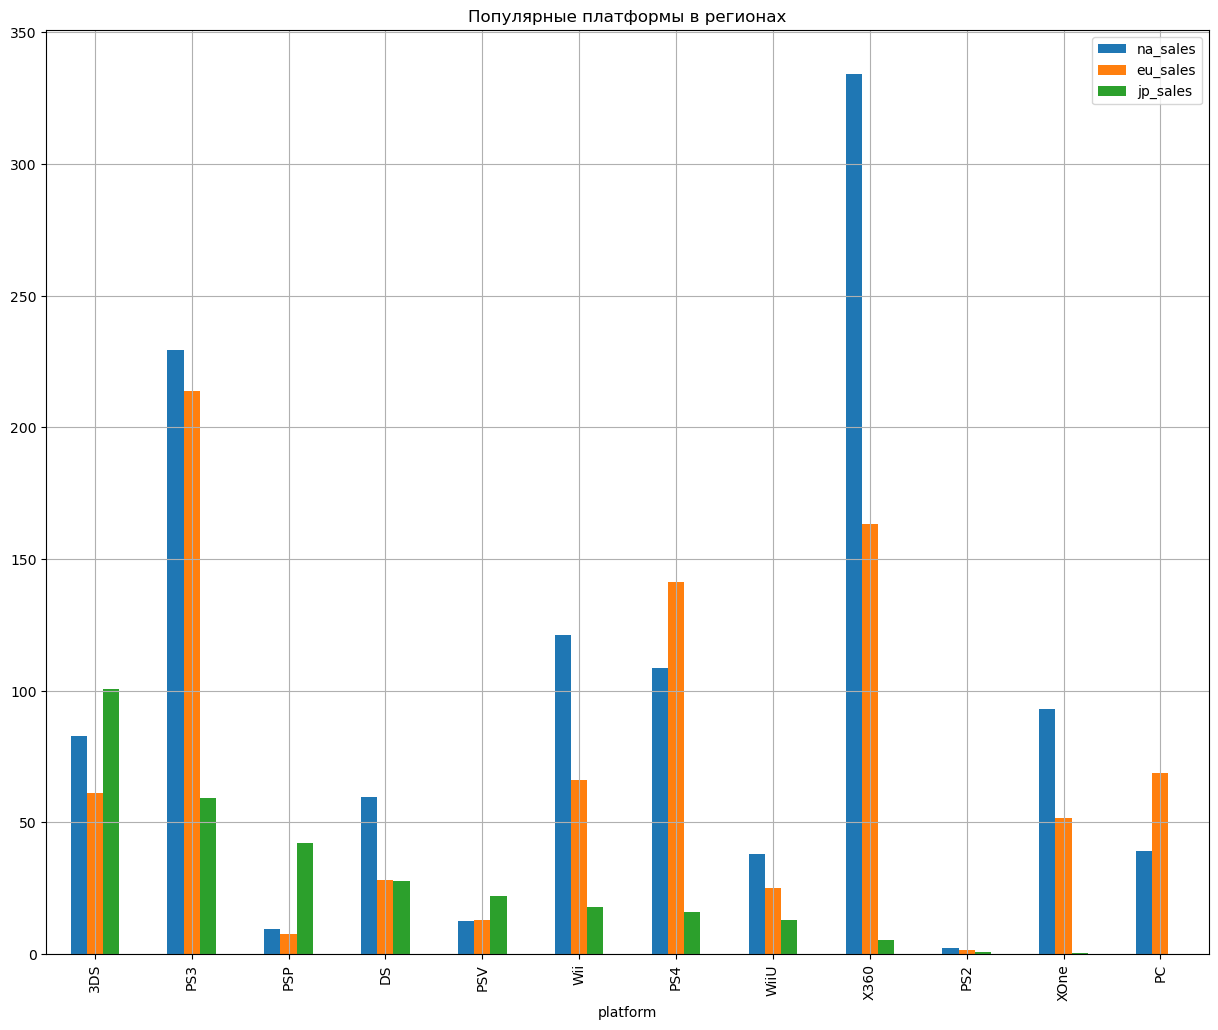

In [44]:
(
    data.query('year_of_release >= 2010')
    .groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending = False)
    .plot(kind='bar', grid = True, figsize = (15, 12), title = 'Популярные платформы в регионах')
)
plt.show();

Топ 5 платформ для Северной Америки:
1. X360
2. PS3
3. Wii
4. PS4
5. XOne

Топ 5 платформ для Европы:
1. PS3
2. X360
3. PS4
4. PC
5. Wii

Топ 5 платформ для Японии:
1. 3DS
2. PS3
3. PSP
4. DS
5. PSV

### Самые популярные жанры (определить топ-5)

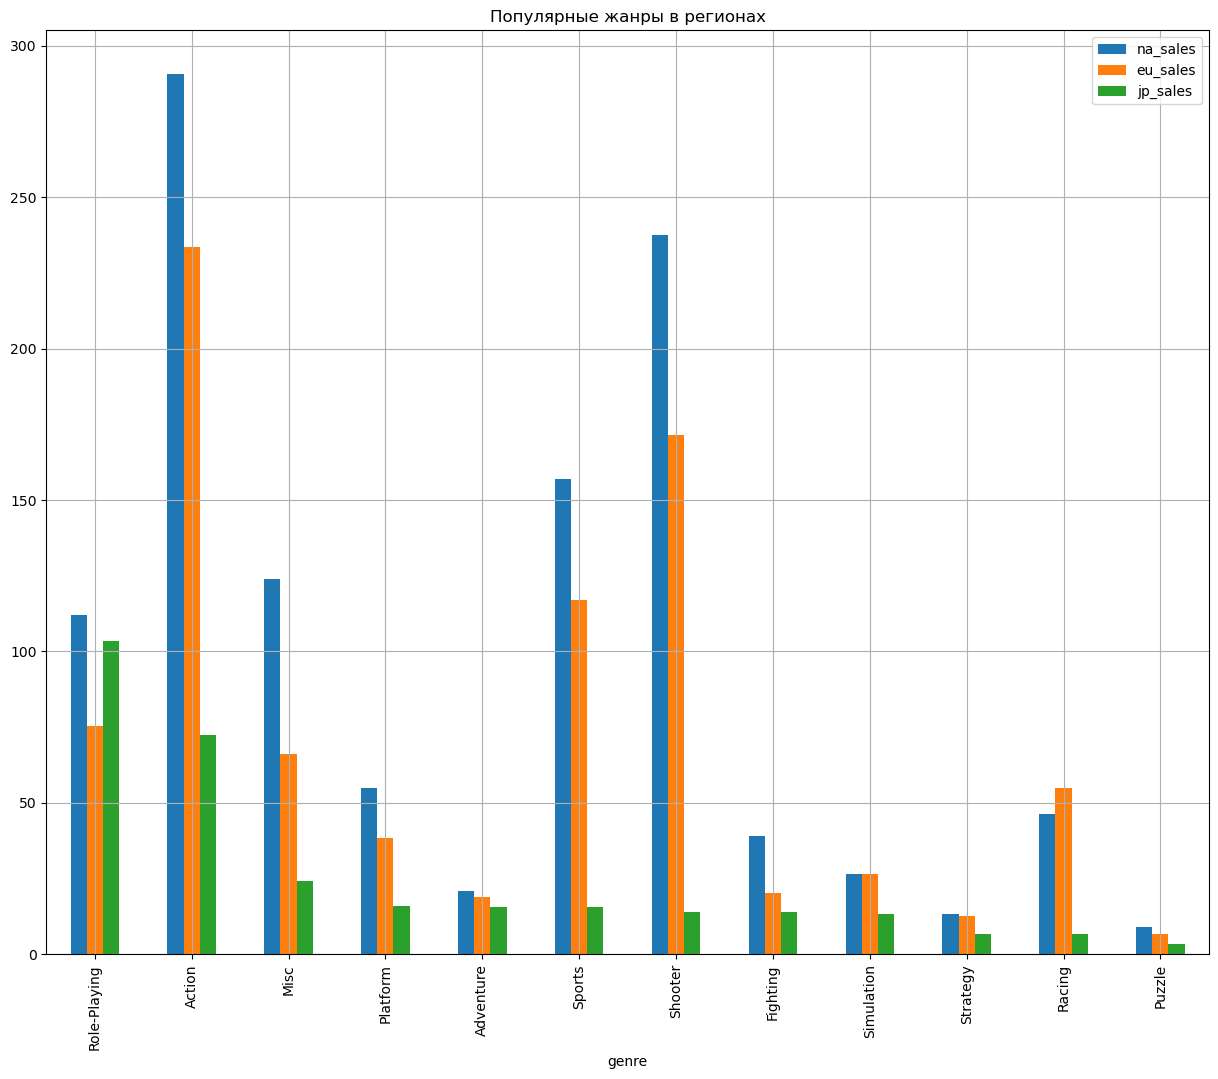

In [45]:
(
    data.query('year_of_release >= 2010')
    .groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
    .sort_values(by = 'jp_sales', ascending = False)
    .plot(kind='bar', grid = True, figsize = (15, 12), title = 'Популярные жанры в регионах')
)
plt.show();

Топ 5 жанров для Северной Америки:
1. Action
2. Shooter
3. Sports
4. Misc.
5. Role-Playing

Топ 5 жанров для Европы:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Топ 5 жанров для Японии:
1. Role-Playing
2. Action
3. Misc
4. Platform
5. Adventure

Вывод: предпочтения по жанрам в Северной Америке схожи с Европой, в то время как игроки Японии больше играют в  РПГ. Так же в рейтинг Японии попали такие жанры как приключения и платформеры. Можно предположить, что японцы отдают предпочтение отечественным производителям игр.

### Влияет ли рейтинг игры на продажи

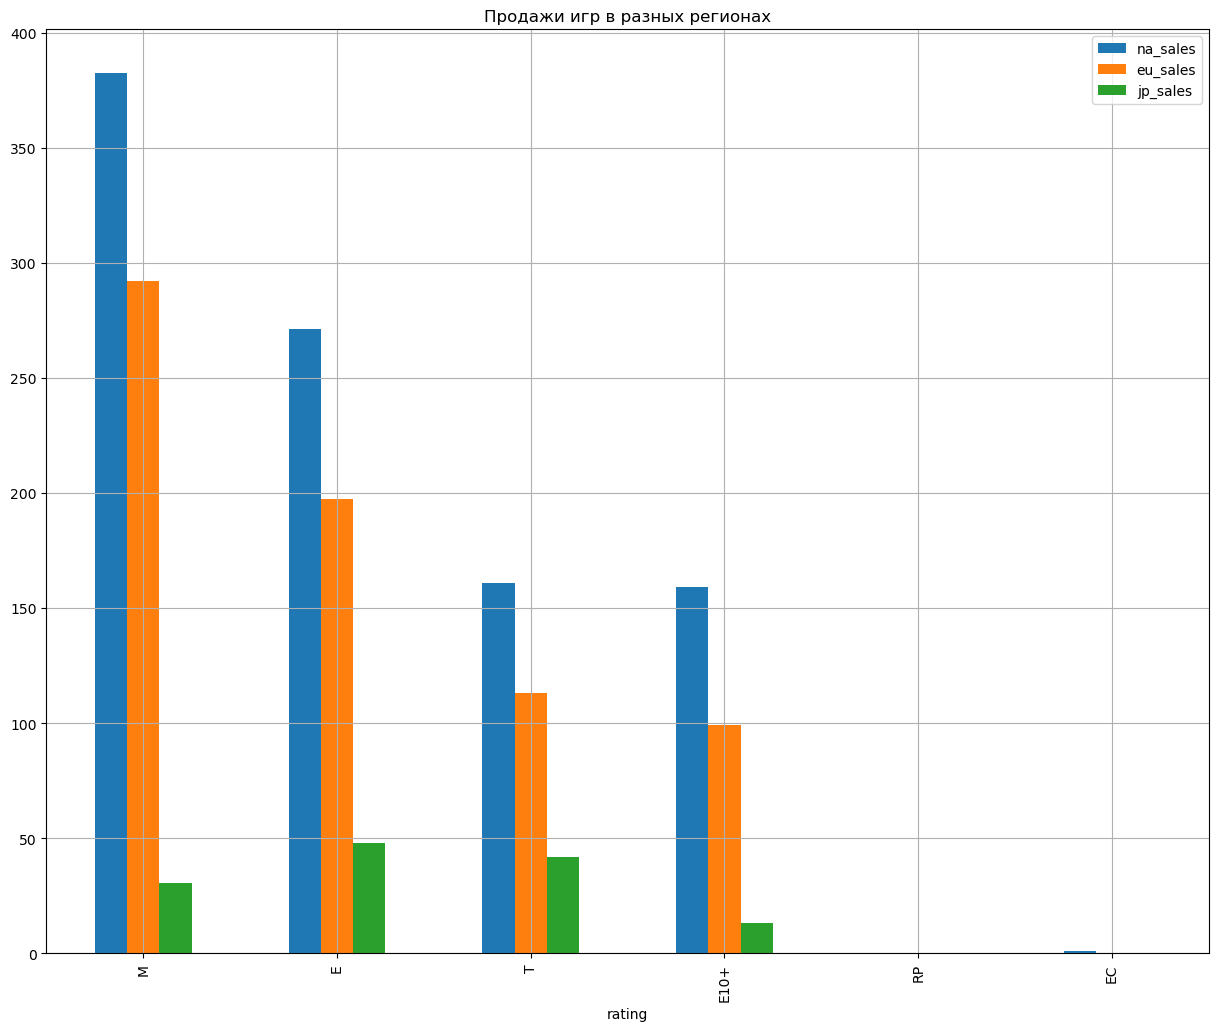

In [46]:
(
    data.query('year_of_release >= 2010')
    .groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
    .sort_values(by = 'eu_sales', ascending = False)
    .plot(kind='bar', grid = True, figsize = (15, 12), title = 'Продажи игр в разных регионах')
)
plt.show();

Вывод: определить влияние рейтинга на продажи игр представляется невозможным из-за большого отсутствия данных в колонке rating. Ранее я писал, что ESRB осуществялет свою деятельность на территориях Севеврной Америки и Канады, а Европа и Япония имеют свои ассоциации определяющие рейтинг для компьютерных игр.

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [47]:
from scipy import stats as st

In [48]:
data = data.dropna(subset=['user_score'])

Н_0: Средние пользовательские рейтинги платформ Xbos One и PC одинаковые

Н_1: Средние пользовательские рейтинги платформ Xbos One и PC разные

In [49]:
XOne = data[data['platform'] == 'XOne']['user_score']
PC = data[data['platform'] == 'PC']['user_score']
results = st.ttest_ind(XOne, PC, equal_var = False)
alpha = .05

In [50]:
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

4.5385802963771835e-06 Отвергаем нулевую гипотезу


In [51]:
data = data.dropna(subset=['critic_score'])

In [52]:
XOne = data[data['platform'] == 'XOne']['critic_score']
PC = data[data['platform'] == 'PC']['critic_score']
results = st.ttest_ind(XOne, PC, equal_var = False)
alpha = .05

In [53]:
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

0.03232612718502168 Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ отличаются.

### Средние пользовательские рейтинги жанров Action и Sports разные

Н_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н_1: Средние пользовательские рейтинги жанров Action и Sports разные

In [54]:
Action = data[data['genre'] == 'Action']['user_score']
Sports = data[data['genre'] == 'Sports']['user_score']
results = st.ttest_ind(Action, Sports, equal_var = False)
alpha = .05

In [55]:
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

0.9787827074917653 Не получилось отвергнуть нулевую гипотезу 


In [56]:
Action = data[data['genre'] == 'Action']['critic_score']
Sports = data[data['genre'] == 'Sports']['critic_score']
results = st.ttest_ind(Action, Sports, equal_var = False)
alpha = .05

In [57]:
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

2.4469934344794624e-28 Отвергаем нулевую гипотезу


Вывод: В первом случае, опираясь на оценки игроков, ретинги жанров одинаковые, во втором же случае, с критиками, рейтинги разные. 

## Общий вывод

В 2017 году стоит обратить внимание на следующее:

1. В Северной Америке и Европе больше всего предпочитают жанры Action, Shooter и Sport. А платформы X360, PS3, PS4 и Wii.
2. В Японии больше всего предпочитают жанры Role-Playing, Action и др. А платформы 3DS, PS3 и PSP.

Исходя из полученных результатов, при выборе игр лучше опираться на оценки критиков. (С другой стороны в данных с оценками слишком много пропусков)

При рассмотрении хронологии количества выпускаемых игр, выявлена факт резкого снижения релиза игр за последние 5 лет по сравнению предшевствующим им 5 годам. Вероятней всего такое снижение связано со сложностью производства новых видео игр и требованиями современных игроков.

С наибольшим количеством проданных игр выделяю шесть следующих платформ, от первого места до шестого: PS4, 3DS, XOne, WiiU, PC, PSV. Больше всего денег тратят пользователи PS4, XOne и Wii. В среднем одна консоль прослужит игроку - 10 лет, а новая консоль появляется в промежутке от 1 года до 3 лет.

Самые прибыльные жанры: Shooter и Sports

Если рассматривать жанры по популярности среди трех регионов, то можно обратить внимание, что предпочтения игроков Североной Америки совпадают с игроками Европы. Их лидеры: Action, Shooter и Sports. В Японии совсем иная ситуация, там игроки отдают предпочтение RP, Action и Misc.

Похожая ситуация и с платформами. В то время как западные игроки отдают предпочтение классическим консолями, восточные же портативным.

В ходе проведения исследования исторических данных о продажах игр, выявлено большое количество пропусков в предоставленном датасете. Такие колонки как critic_score, user_score и rating имеют пропуски от 40% до 50% от общего числа данных. Такое количество недостающей информации может сильно отразиться на результатах исследования. Следует озвучить выявленную проблему людям ответственным за выгрузку данных и после устранения проблемы повторно провести исследование по некоторым пунктам.